In [1]:
# ignora avisos
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import matplotlib as mpl
import seaborn as sb
import numpy as np

In [2]:
def plot(get_chart, xlabel=None, ylabel=None, title=None , figsize=(25,15)):
    titledict = {'fontweight':'bold', 'fontsize': 40}
    labeldict = {'fontsize': 40}
    plt.figure(figsize = figsize)
    ax = get_chart()
    title and ax.set_title(title + "\n", fontdict=titledict)
    xlabel and ax.set_xlabel(xlabel, fontdict=labeldict)
    xlabel and ax.set_ylabel(ylabel, fontdict=labeldict)
    ax.ticklabel_format(axis='y',style='plain', )
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.setp(ax.get_legend().get_texts(), fontsize='40') # for legend text
    ax.set_yscale("log")
    plt.show()

In [3]:
# lista de todos os arquivos
caged_files = sorted(glob('CAGED_DATA/CAGEDMOV*.txt'))
main_df = pd.concat((pd.read_csv(file, sep=';') for file in caged_files), ignore_index=True)

In [4]:
#Lista todos os arquivos carregados e concatenados no dataframe pandemia_df
caged_files

['CAGED_DATA\\CAGEDMOV202001.txt',
 'CAGED_DATA\\CAGEDMOV202002.txt',
 'CAGED_DATA\\CAGEDMOV202003.txt',
 'CAGED_DATA\\CAGEDMOV202004.txt',
 'CAGED_DATA\\CAGEDMOV202005.txt',
 'CAGED_DATA\\CAGEDMOV202006.txt',
 'CAGED_DATA\\CAGEDMOV202007.txt',
 'CAGED_DATA\\CAGEDMOV202008.txt',
 'CAGED_DATA\\CAGEDMOV202009.txt',
 'CAGED_DATA\\CAGEDMOV202010.txt',
 'CAGED_DATA\\CAGEDMOV202011.txt',
 'CAGED_DATA\\CAGEDMOV202012.txt',
 'CAGED_DATA\\CAGEDMOV202101.txt',
 'CAGED_DATA\\CAGEDMOV202102.txt',
 'CAGED_DATA\\CAGEDMOV202103.txt',
 'CAGED_DATA\\CAGEDMOV202104.txt']

In [5]:
#Lista as colunas do dataframe
main_df.columns

Index(['competência', 'região', 'uf', 'município', 'seção', 'subclasse',
       'saldomovimentação', 'categoria', 'cbo2002ocupação', 'graudeinstrução',
       'idade', 'sexo', 'tipoempregador', 'tipoestabelecimento',
       'tipomovimentação', 'indtrabintermitente', 'indtrabparcial', 'salário',
       'horascontratuais', 'tipodedeficiência', 'raçacor', 'indicadoraprendiz',
       'fonte', 'tamestabjan'],
      dtype='object')

In [6]:
#Quero poder visualizar as causas de demissão formalizadas pelos empregadores distribuídas por sexo, raça/cor e faixa etária

In [7]:
main_df['Sexo']= main_df['sexo'].map({
1:'Masculino',
3:'Feminino',
9:'Nao Identificado'})
main_df['Raça'] = main_df['raçacor'].map({
1:'Branca',
2:'Preta',
3:'Parda',
4:'Amarela',
5:'Indigena',
6:'Nao Informada',
9:'Nao Identificado'})
main_df['Tipo de movimentação'] = main_df['tipomovimentação'].map({
10:'Admissão por Primeiro Emprego',
20:'Admissão por Reemprego', 
25:'Admissão por contrato trabalho prazo determinado',
31:'Desligamento por Demissão sem Justa Causa', 
32:'Desligamento por Demissão com Justa Causa', 
33:'Culpa Recíproca',
35:'Admissão por Reintegraçao', 
40:'Desligamento a Pedido',
43:'Término contrato trabalho prazo determinado',
45:'Desligamento por Término de Contrato',
50:'Desligamento por Aposentadoria', 
60:'Desligamento por morte',
70:'Admissão por Transferência', 
80:'Desligamento por Transferência', 
90:'Desliamento por Acordo Empregado e Empregador',
98:'Desligamento de Tipo Ignorado',
99:'Não Identificado'})

In [8]:
conditions = [
    (main_df['tipomovimentação'].isin([10,20,25,35,70])),
    (main_df['tipomovimentação'].isin([31,32,33,40,43,45,50,60,80,90,98])),
    (main_df['tipomovimentação'].isin([99]))
    ]

values = ['Admitido', 'Desligado', 'Não identificado']

main_df['movimento'] = np.select(conditions, values)

In [9]:
conditions = [
    (main_df['município'].isin([350250, 350315, 350350, 350410, 350490, 350710, 350760, 350850, 350860, 350970, 350995, 351050, 351340, 351360, 351840, 352020, 352040, 352440, 352490, 352550, 352630, 352660, 352720, 353170, 353230, 353240, 353560, 353800, 353850, 353860, 354075, 354190, 354230, 354430, 354600, 354820, 354860, 354960, 354990, 355000, 355070, 355200, 355410, 355480, 355540, 355635])),
    ]

values = ['1']

main_df['municipio_vanguarda'] = np.select(conditions, values)

In [10]:
desligamento_df = main_df[main_df['movimento']=='Desligado']
desligamento_df = desligamento_df[desligamento_df['Raça']!='Nao Informada']
desligamento_df = desligamento_df[desligamento_df['Raça']!='Nao Identificado']
desligamento_vanguarda_df = desligamento_df[desligamento_df['municipio_vanguarda']=='1']

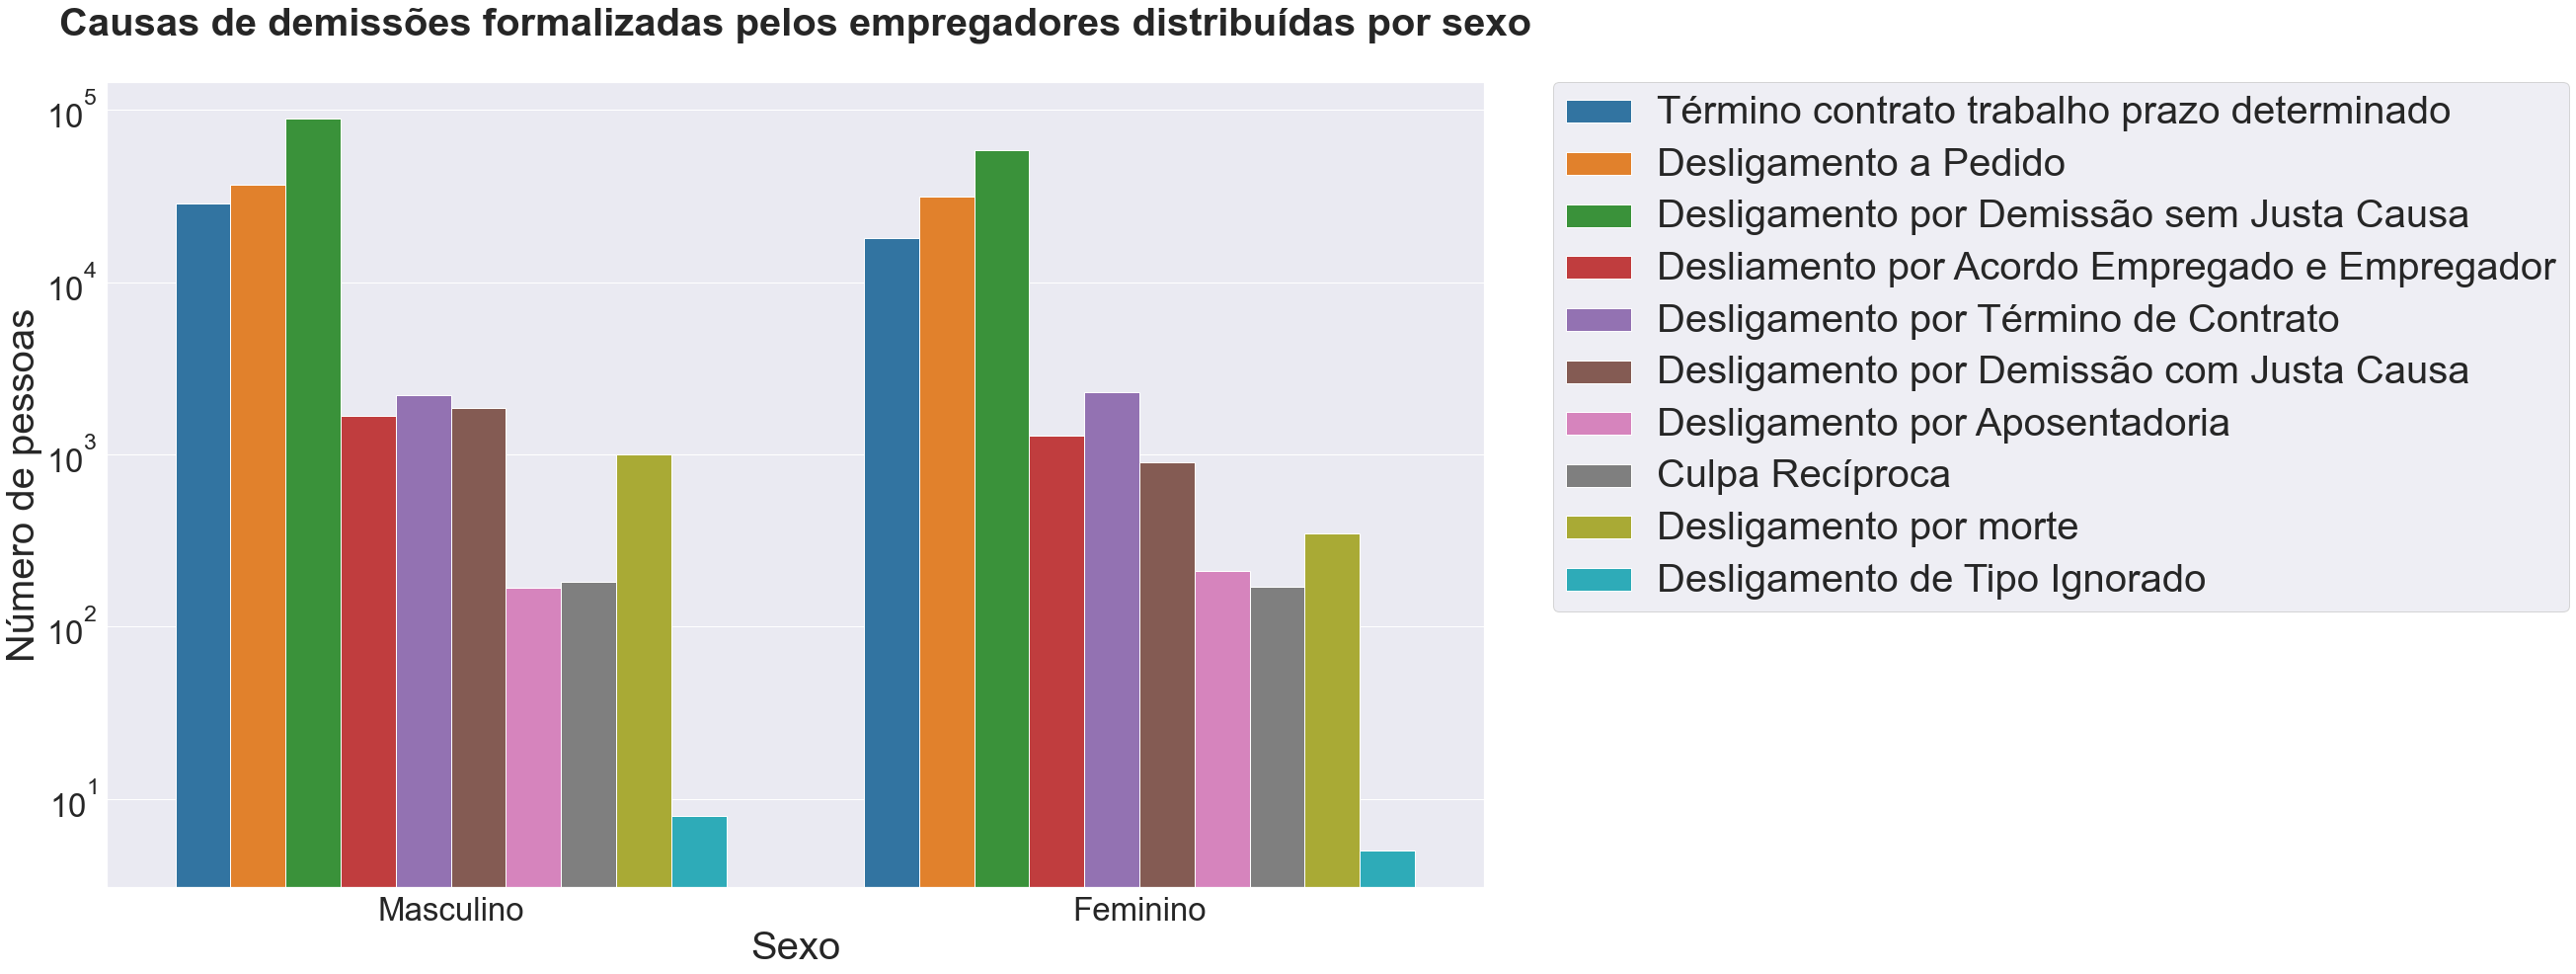

In [11]:
sb.set(font_scale=3)
plot(
    lambda: sb.countplot(hue='Tipo de movimentação', x='Sexo',data = desligamento_vanguarda_df, palette='tab10'),
    title="Causas de demissões formalizadas pelos empregadores distribuídas por sexo",
    xlabel="Sexo",
    ylabel="Número de pessoas",
)

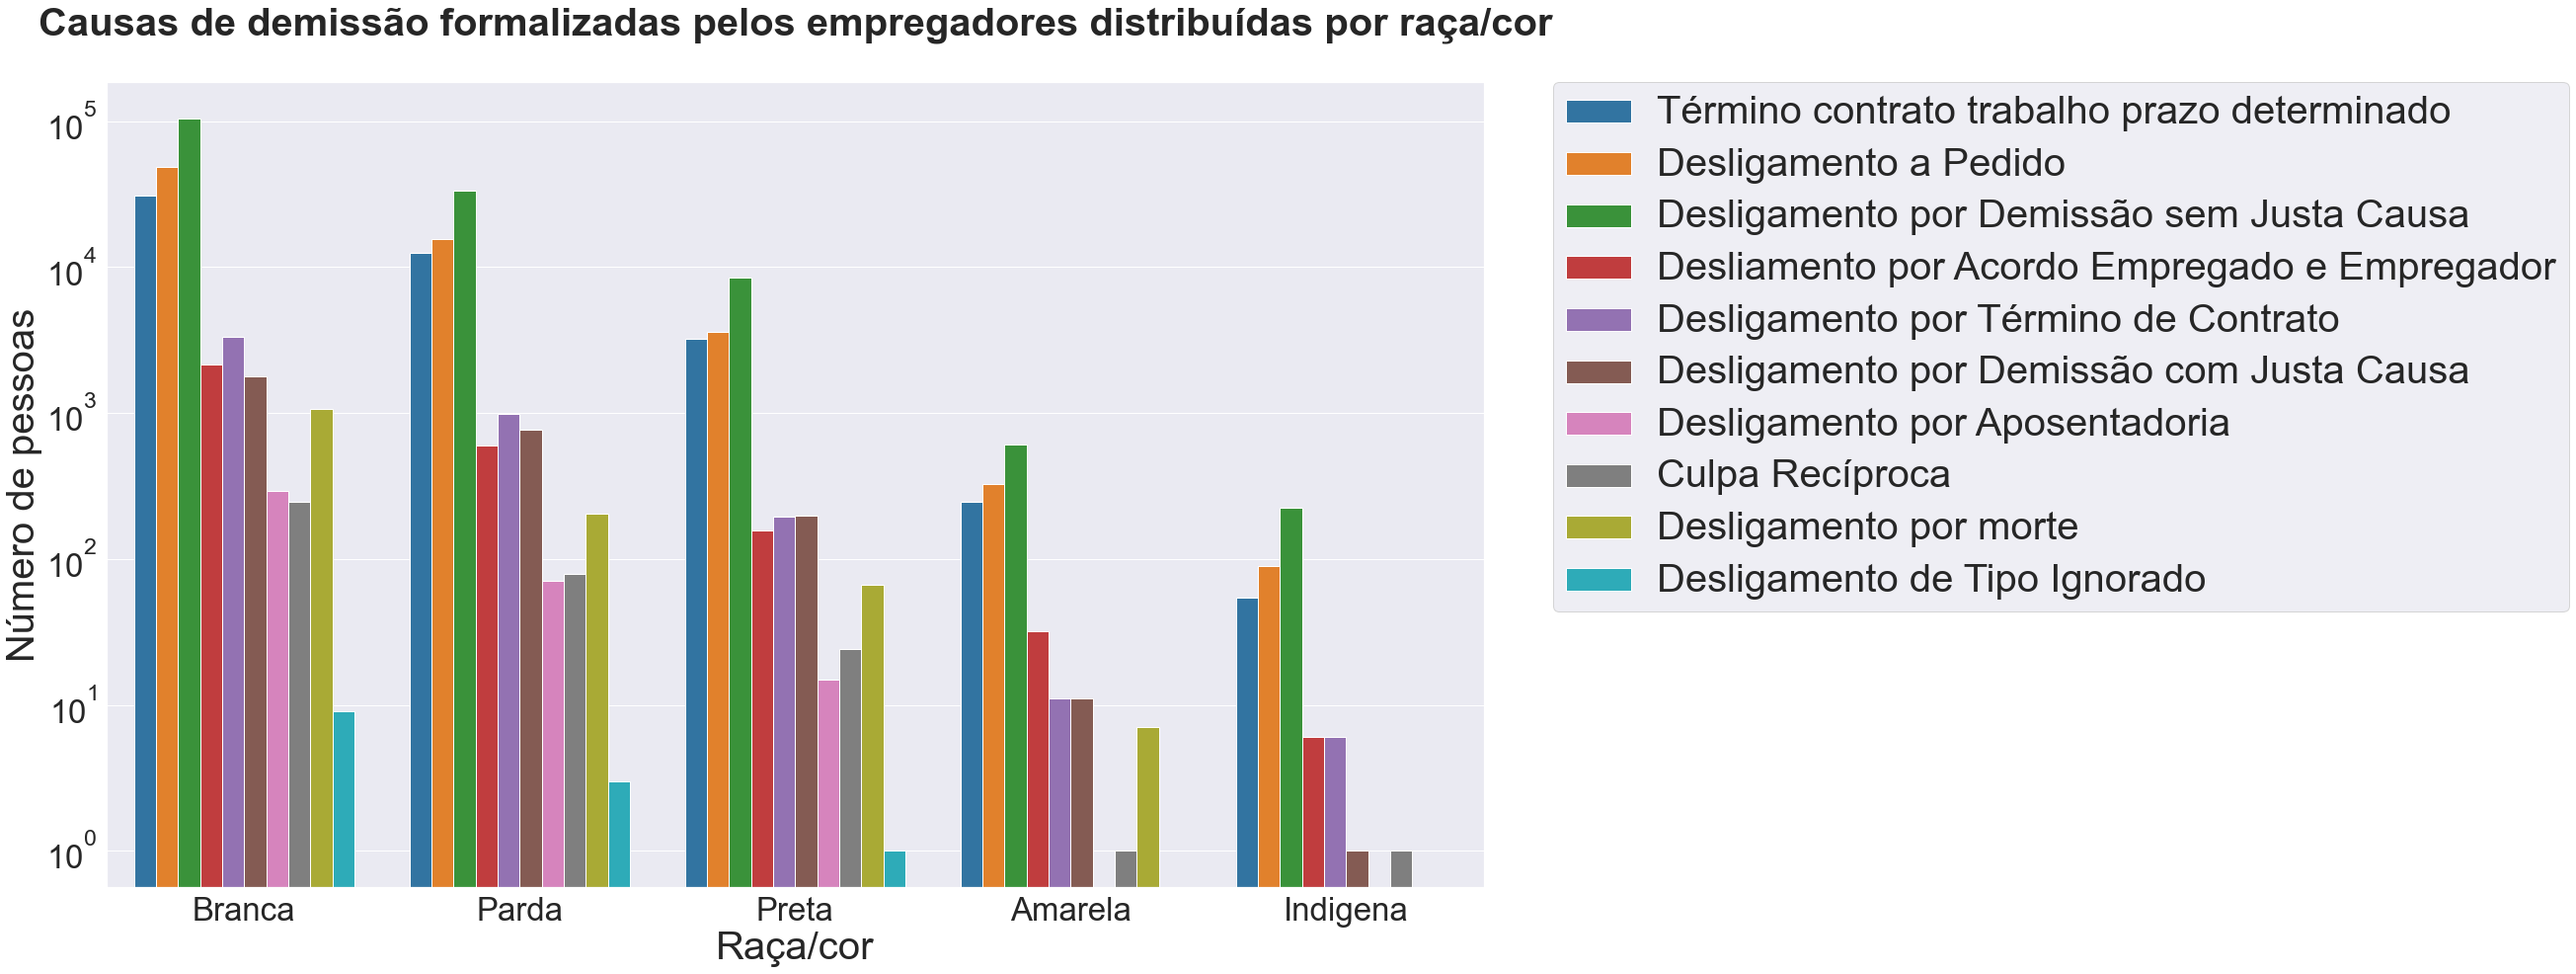

In [12]:
sb.set(font_scale=3)
plot(
    lambda: sb.countplot(hue='Tipo de movimentação', x='Raça',data = desligamento_vanguarda_df, palette='tab10'),
    title="Causas de demissão formalizadas pelos empregadores distribuídas por raça/cor",
    xlabel="Raça/cor",
    ylabel="Número de pessoas"
)

In [13]:
conditions = [
    (desligamento_vanguarda_df['idade'] == 0),
    ((desligamento_vanguarda_df['idade'] > 0) & (desligamento_vanguarda_df['idade'] <= 19)),
    ((desligamento_vanguarda_df['idade'] >= 20) & (desligamento_vanguarda_df['idade'] <= 59)),
    (desligamento_vanguarda_df['idade'] >= 60)
    ]

values = ['Não identificado','Jovem', 'Adulto', 'Idoso']

desligamento_vanguarda_df['faixa_etaria'] = np.select(conditions, values)

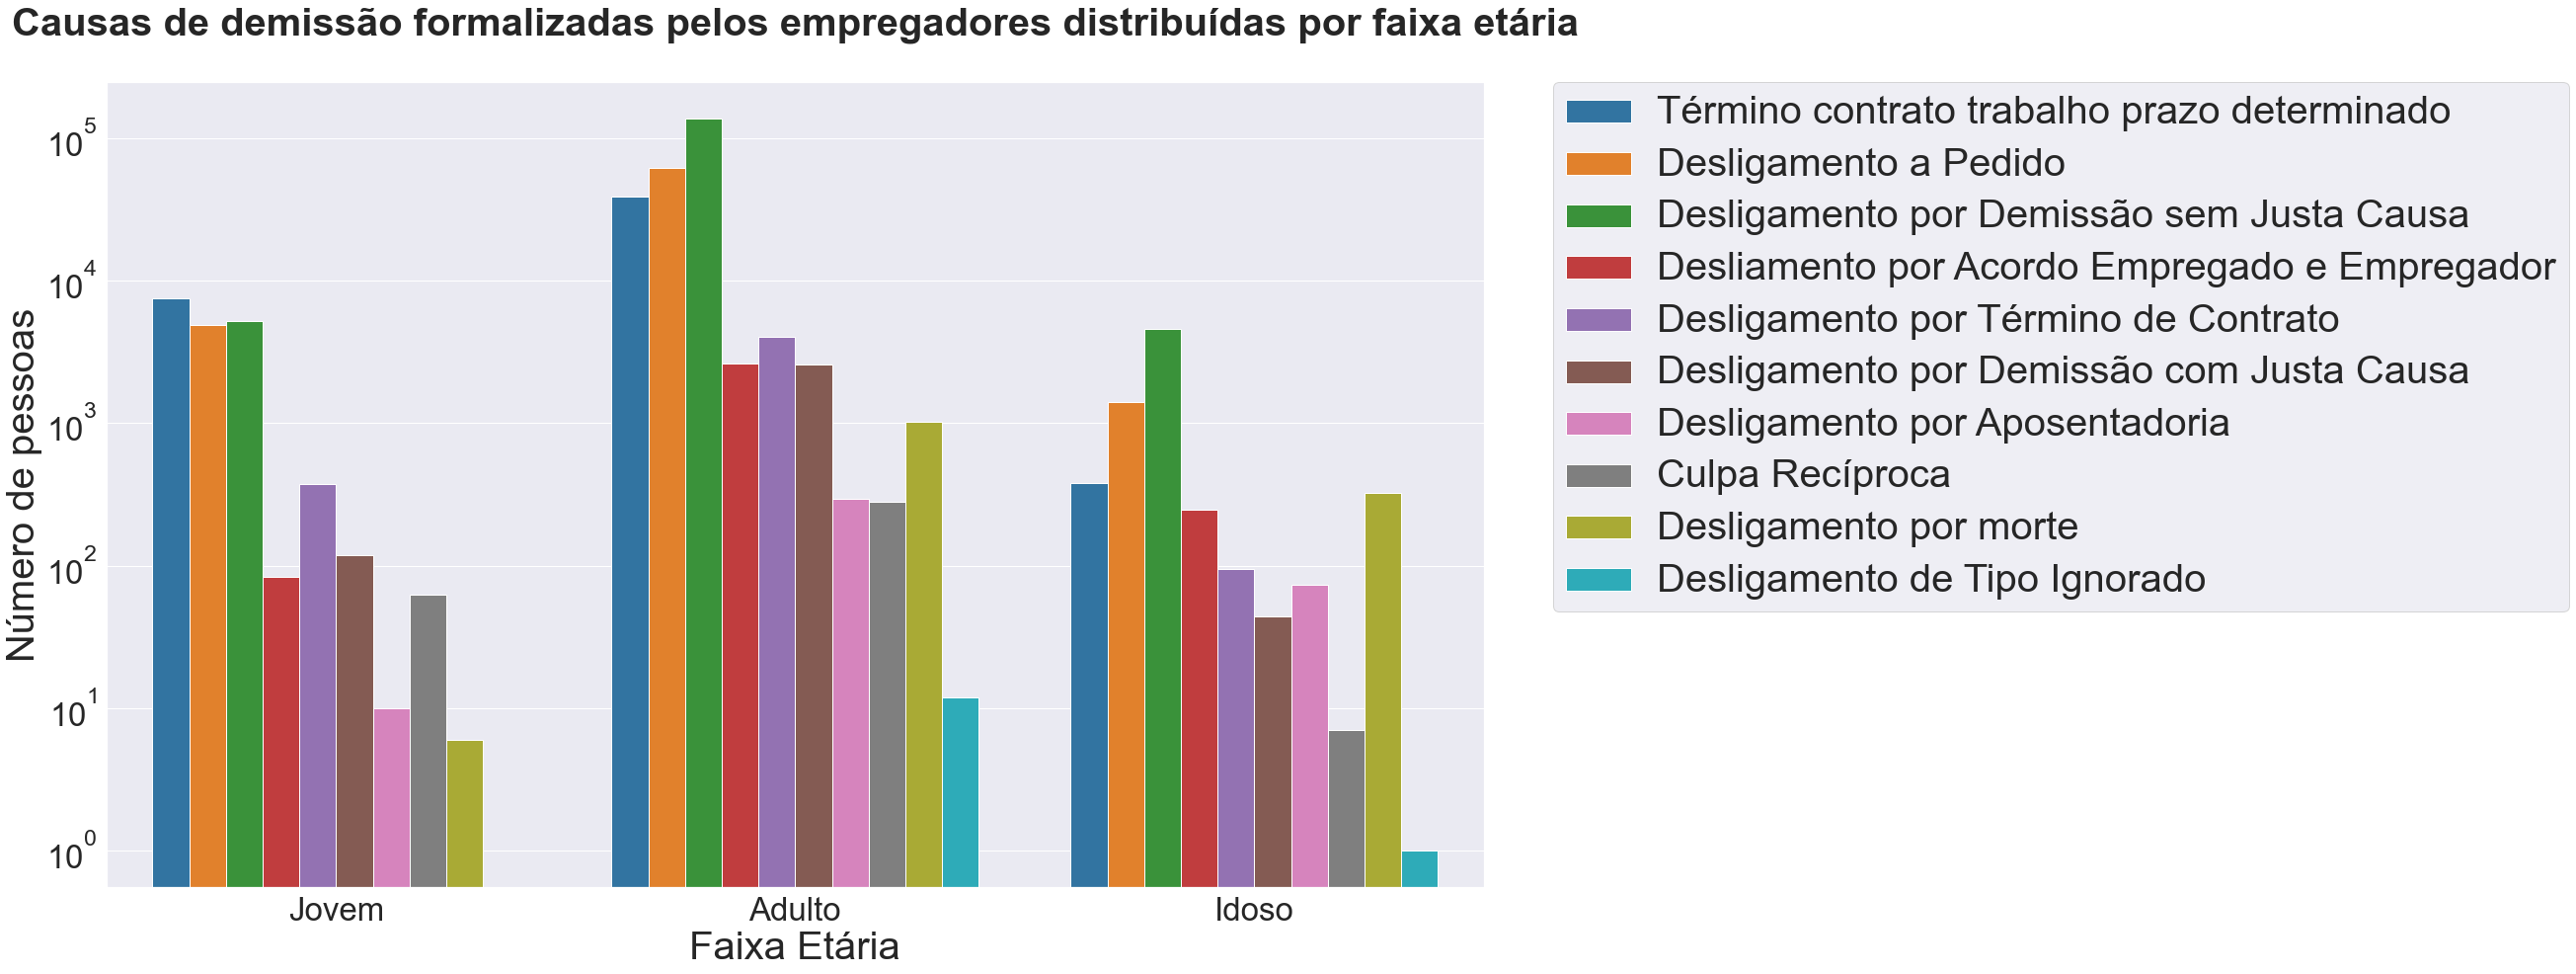

In [14]:
sb.set(font_scale=3)
plot(
    lambda: sb.countplot(hue='Tipo de movimentação', x='faixa_etaria',data = desligamento_vanguarda_df, palette='tab10'),
    title="Causas de demissão formalizadas pelos empregadores distribuídas por faixa etária",
    xlabel="Faixa Etária",
    ylabel="Número de pessoas",
)